# Pivot Tables with Pandas - Lab

## Introduction

In this lab, we'll learn how to make use of our newfound knowledge of pivot tables to work with real-world data.  

## Objectives

In this lab you will:

- Describe what is meant by long and wide format data 
- Use multi-hierarchical indexing to access aggregated data 
- Use pivot to create a more organized aggregated DataFrame 
- Use stack and unstack to move between different level of multi-indexing 

## Getting Started

In the cell below:

* Import `pandas` and set the standard alias   
* Import `matplotlib.pyplot` and set the standard alias   
* Run the iPython magic command to display matplotlib graphs inline within the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data
The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab separated values' instead of 'comma separated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` function.

In [2]:
df = pd.read_csv('causes_of_death.tsv',delimiter='\t' )

Now, display the head of the DataFrame to ensure everything loaded correctly.

In [3]:
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


In [4]:
df.tail()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
4110,NaN,Wyoming,56,85+ years,85+,Female,F,White,2106-3,13140,95575,13748.4
4111,NaN,Wyoming,56,85+ years,85+,Male,M,American Indian or Alaska Native,1002-5,41,356,11516.9
4112,NaN,Wyoming,56,85+ years,85+,Male,M,Asian or Pacific Islander,A-PI,12,244,Unreliable
4113,NaN,Wyoming,56,85+ years,85+,Male,M,Black or African American,2054-5,32,454,7048.5
4114,NaN,Wyoming,56,85+ years,85+,Male,M,White,2106-3,7982,49954,15978.7


In [5]:
df.shape

(4115, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null object
Crude Rate                  4115 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


In [7]:
df.describe()

,Notes,State Code,Deaths
count,0.0,4115.000000,4115.000000
mean,NaN,28.653706,10914.449575
std,NaN,15.608135,39418.879794
min,NaN,1.000000,10.000000
25%,NaN,16.000000,78.000000
50%,NaN,29.000000,437.000000
75%,NaN,41.000000,3658.500000
max,NaN,56.000000,720306.000000


Our data is currently in **_Wide_** format.  We can tidy this up by converting it to **_Long_** format by using groupby statements to aggregate our data into a much neater, more readable format. 

## Groupby aggregations

Complete the following groupby statements.

- Groupby `State` and `Gender`. Sum the values.

In [8]:
# Your code here
df.groupby(['State','Gender']).describe()

Notes                              State Code        ...  \
                     count mean std min 25% 50% 75% max      count  mean  ...   
State         Gender                                                      ...   
Alabama       Female   0.0  NaN NaN NaN NaN NaN NaN NaN       40.0   1.0  ...   
              Male     0.0  NaN NaN NaN NaN NaN NaN NaN       41.0   1.0  ...   
Alaska        Female   0.0  NaN NaN NaN NaN NaN NaN NaN       40.0   2.0  ...   
              Male     0.0  NaN NaN NaN NaN NaN NaN NaN       42.0   2.0  ...   
Arizona       Female   0.0  NaN NaN NaN NaN NaN NaN NaN       45.0   4.0  ...   
...                    ...  ...  ..  ..  ..  ..  ..  ..        ...   ...  ...   
West Virginia Male     0.0  NaN NaN NaN NaN NaN NaN NaN       31.0  54.0  ...   
Wisconsin     Female   0.0  NaN NaN NaN NaN NaN NaN NaN       44.0  55.0  ...   
              Male     0.0  NaN NaN NaN NaN NaN NaN NaN       44.0  55.0  ...   
Wyoming       Female   0.0  NaN NaN NaN NaN NaN NaN NaN       32.0  56.0  ...   
              Male     0.0  NaN NaN NaN NaN NaN NaN NaN       35.0  56.0  ...   

                                 Deaths                                    \
                       75%   max  count          mean           std   min   
State         Gender                                                        
Alabama       Female   1.0   1.0   40.0  10753.325000  24612.250487  10.0   
              Male     1.0   1.0   41.0  10503.585366  20620.218089  10.0   
Alaska        Female   2.0   2.0   40.0    679.975000   1154.870455  13.0   
              Male     2.0   2.0   42.0    860.357143   1411.777392  12.0   
Arizona       Female   4.0   4.0   45.0   8800.622222  25979.871632  21.0   
...                    ...   ...    ...           ...           ...   ...   
West Virginia Male    54.0  54.0   31.0   6211.612903  13336.347773  10.0   
Wisconsin     Female  55.0  55.0   44.0   9918.113636  33167.159673  10.0   
              Male    55.0  55.0   44.0   9573.454545  25681.359187  13.0   
Wyoming       Female  56.0  56.0   32.0   1161.031250   2937.935467  10.0   
              Male    56.0  56.0   35.0   1149.514286   2569.276968  10.0   

                                                         
                         25%    50%       75%       max  
State         Gender                                     
Alabama       Female   93.25  371.0   8183.75  116297.0  
              Male     92.00  495.0  12016.00   88930.0  
Alaska        Female   64.00  208.5    807.00    4727.0  
              Male     83.25  219.0    958.00    5185.0  
Arizona       Female  202.00  795.0   2456.00  133923.0  
...                      ...    ...       ...       ...  
West Virginia Male     27.50  345.0   2104.50   51167.0  
Wisconsin     Female  120.75  506.5   2556.25  189242.0  
              Male    184.00  553.5   3062.75  113692.0  
Wyoming       Female   29.75   72.0    319.50   13140.0  
              Male     20.00   70.0    295.00   10113.0  

[102 rows x 24 columns]

In [9]:
df.groupby(['State','Gender']).sum()

Notes  State Code  Deaths
State         Gender                           
Alabama       Female    0.0          40  430133
              Male      0.0          41  430647
Alaska        Female    0.0          80   27199
              Male      0.0          84   36135
Arizona       Female    0.0         180  396028
...                     ...         ...     ...
West Virginia Male      0.0        1674  192560
Wisconsin     Female    0.0        2420  436397
              Male      0.0        2420  421232
Wyoming       Female    0.0        1792   37153
              Male      0.0        1960   40233

[102 rows x 3 columns]

- Groupby `State`, `Gender`, and `Race`. Find the average values.

In [10]:
# Your code here
df.groupby(['State','Gender','Race']).mean()


Notes  State Code  \
State   Gender Race                                                  
Alabama Female American Indian or Alaska Native    NaN         1.0   
               Asian or Pacific Islander           NaN         1.0   
               Black or African American           NaN         1.0   
               White                               NaN         1.0   
        Male   American Indian or Alaska Native    NaN         1.0   
...                                                ...         ...   
Wyoming Female White                               NaN        56.0   
        Male   American Indian or Alaska Native    NaN        56.0   
               Asian or Pacific Islander           NaN        56.0   
               Black or African American           NaN        56.0   
               White                               NaN        56.0   

                                                       Deaths  
State   Gender Race                                            
Alabama Female American Indian or Alaska Native     70.875000  
               Asian or Pacific Islander            95.500000  
               Black or African American          9074.000000  
               White                             29890.636364  
        Male   American Indian or Alaska Native     86.375000  
...                                                       ...  
Wyoming Female White                              3279.454545  
        Male   American Indian or Alaska Native    103.000000  
               Asian or Pacific Islander            15.000000  
               Black or African American            28.333333  
               White                              3533.909091  

[408 rows x 3 columns]

- Groupby `Gender` and `Race`. Find the minimum values.

In [11]:
# Your code here
df.groupby(['Gender','Race']).min()

Notes    State  State Code  \
Gender Race                                                           
Female American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   
Male   American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   

                                        Ten-Year Age Groups  \
Gender Race                                                   
Female American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   
Male   American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   

                                        Ten-Year Age Groups Code Gender Code  \
Gender Race                                                                    
Female American Indian or Alaska Native                        1           F   
       Asian or Pacific Islander                               1           F   
       Black or African American                               1           F   
       White                                                   1           F   
Male   American Indian or Alaska Native                        1           M   
       Asian or Pacific Islander                               1           M   
       Black or African American                               1           M   
       White                                                   1           M   

                                        Race Code  Deaths Population  \
Gender Race                                                            
Female American Indian or Alaska Native    1002-5      10     100285   
       Asian or Pacific Islander             A-PI      10     100371   
       Black or African American           2054-5      10     100170   
       White                               2106-3      12    1000704   
Male   American Indian or Alaska Native    1002-5      10       1001   
       Asian or Pacific Islander             A-PI      10    1000019   
       Black or African American           2054-5      10       1000   
       White                               2106-3      10    1005401   

                                        Crude Rate  
Gender Race                                         
Female American Indian or Alaska Native       10.4  
       Asian or Pacific Islander              10.1  
       Black or African American             100.3  
       White                                  10.1  
Male   American Indian or Alaska Native    10000.0  
       Asian or Pacific Islander              10.0  
       Black or African American            1000.4  
       White                                  10.6

Create a bar chart of the total number of deaths by state: 

* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `.sum()` method.  You can even chain the `.plot()` method on after the `.sum()` method and do this all on one line, excluding the labeling of the graph!

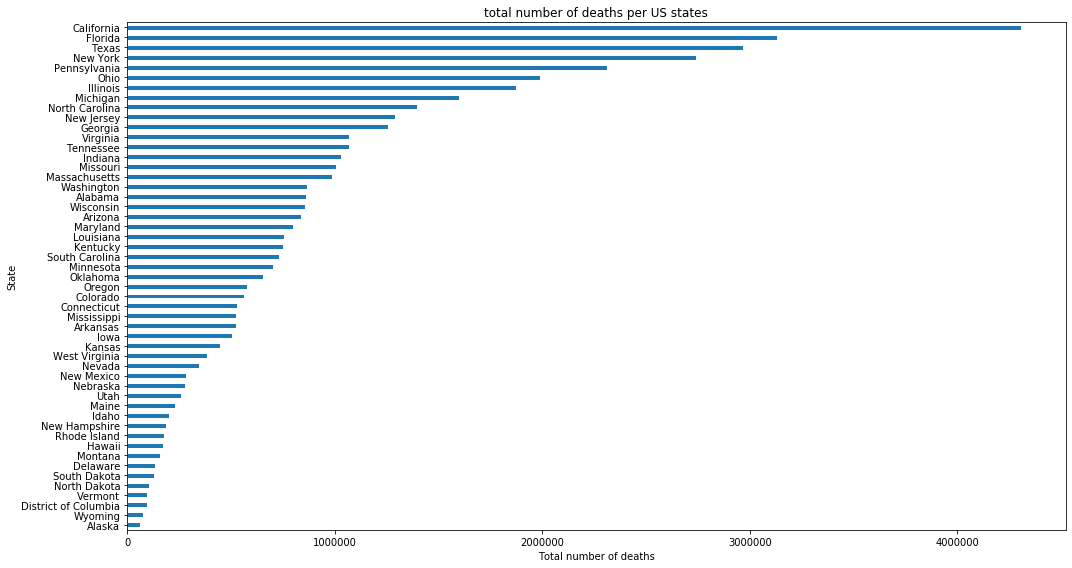

State
Alabama                  860780
Alaska                    63334
Arizona                  838094
Arkansas                 522914
California              4307061
Colorado                 561283
Connecticut              531290
Delaware                 135933
District of Columbia      94073
Florida                 3131111
Georgia                 1259017
Hawaii                   172244
Idaho                    200077
Illinois                1872171
Indiana                 1031634
Iowa                     507247
Kansas                   448828
Kentucky                 752585
Louisiana                755914
Maine                    231756
Maryland                 800510
Massachusetts            987031
Michigan                1599942
Minnesota                702284
Mississippi              526127
Missouri                1008288
Montana                  158429
Nebraska                 277962
Nevada                   345245
New Hampshire            187917
New Jersey              1291554
Ne

In [12]:
# Your code here

# print(df.groupby('State')['Deaths'].sum())
# print(len(df.groupby('State')['Deaths'].sum()))
# print(list(df.groupby('State')['Deaths'])[50])

plt.figure(figsize=(15,8))
# plt.grid(zorder=0,color='Blue')
plt.title("total number of deaths per US states")
plt.xlabel("Total number of deaths")
plt.ylabel("frequency")

df.groupby('State')['Deaths'].sum().sort_values().plot(kind='barh',edgecolor='White')

plt.tight_layout()

plt.show()

df.groupby('State')['Deaths'].sum()


### Inspecting our data

Let's go one step further and print the data type of each column. 

In the cell below, use the `.info()` method of the DataFrame, and note the data type that each column is currently stored as.  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null object
Crude Rate                  4115 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


In [14]:
df.dtypes

Notes                       float64
State                        object
State Code                    int64
Ten-Year Age Groups          object
Ten-Year Age Groups Code     object
Gender                       object
Gender Code                  object
Race                         object
Race Code                    object
Deaths                        int64
Population                   object
Crude Rate                   object
dtype: object

Let's look at some samples from the `Population` column to see if the current encoding seems appropriate for the data it contains. 

In the cell below, display the population values for the first 5 rows in the DataFrame.  

In [15]:
df['Population'][0:4]

0      3579
1      7443
2    169339
3    347921
Name: Population, dtype: object

Just to be extra sure, let's check the value counts to see how many times each unique value shows up in the dataset. We'll only look at the top 5. 

In the cell below, print out the top 5 `value_counts()` of the population column of the DataFrame. 

In [16]:
df['Population'].value_counts()

Not Applicable    75
85539              2
367                2
87405              2
3556               2
                  ..
3759               1
21617              1
1391071            1
5816748            1
498450             1
Name: Population, Length: 4009, dtype: int64

Clearly, this data should be stored as a numeric type, not a categorical type.  
 
### Reformat the `Population` column as an integer
As it stands, not all values can be reformated as integers. Most of the cells in the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `'Not Applicable'`.

We need to remove these rows before we can cast the `Population` column to an integer data type. 

In the cell below:

* Slice the rows of `df` where the `Population` column is equal to `'Not Applicable'`  
* Use `to_drop.index` to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`  
* Cast the `Population` column to an integer data type using the `.astype()` method, with the single parameter `int64` passed in  
* Print the `Population` column's `dtype` attribute to confirm it is now stored in `int64` format  


**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it!

In [17]:
# Your code here
to_drop=df[ df['Population'] == 'Not Applicable' ]

df2 = df.drop(to_drop.index,axis=0,inplace=False)

df2['Population'] = df2['Population'].astype('int64')
df2.dtypes

Notes                       float64
State                        object
State Code                    int64
Ten-Year Age Groups          object
Ten-Year Age Groups Code     object
Gender                       object
Gender Code                  object
Race                         object
Race Code                    object
Deaths                        int64
Population                    int64
Crude Rate                   object
dtype: object

### Complete the bar chart

Now that we've reformatted our data, let's create a bar chart of the mean `Population` by `State`. 

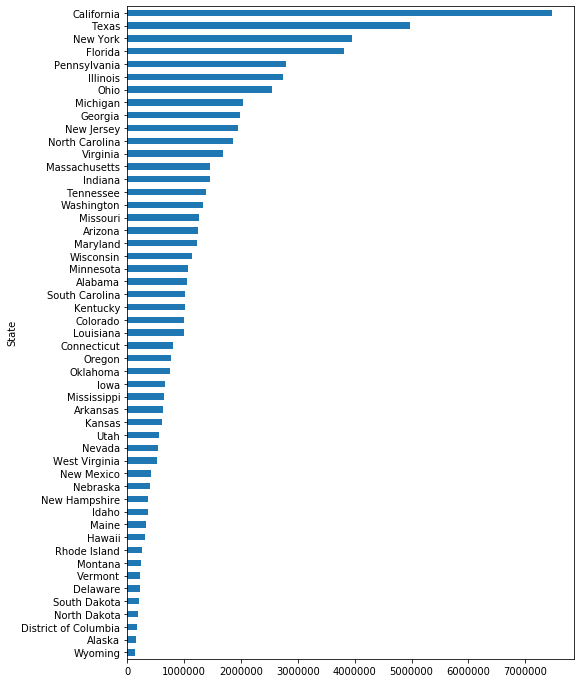

In [18]:
# Your code here
plt.figure(figsize=(8,12))

df2.groupby('State')['Population'].mean().sort_values().plot(kind='barh')

Below we will investigate how we can combine the `.pivot()` method along with the `.groupby()` method to combine some cool **stacked bar charts**!

## Use aggregate methods

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Deaths'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation of these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the `.head()` of this new DataFrame.

In [19]:
# Your code here
grouped = df2.groupby(['State','Gender'])['Deaths','Population'].agg(['mean','min','max'])

grouped.head()

Deaths                Population                
                        mean min     max          mean    min      max
State   Gender                                                        
Alabama Female  10753.325000  10  116297  1.078713e+06   2087  4334752
        Male    10765.850000  10   88930  1.014946e+06   1129  4284775
Alaska  Female    679.975000  13    4727  1.440403e+05   1224   682855
        Male      860.357143  12    5185  1.518884e+05    578   770502
Arizona Female   8998.386364  21  133923  1.246502e+06  12211  6265346

Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

In [20]:
grouped.index

MultiIndex([(      'Alabama', 'Female'),
            (      'Alabama',   'Male'),
            (       'Alaska', 'Female'),
            (       'Alaska',   'Male'),
            (      'Arizona', 'Female'),
            (      'Arizona',   'Male'),
            (     'Arkansas', 'Female'),
            (     'Arkansas',   'Male'),
            (   'California', 'Female'),
            (   'California',   'Male'),
            ...
            (     'Virginia', 'Female'),
            (     'Virginia',   'Male'),
            (   'Washington', 'Female'),
            (   'Washington',   'Male'),
            ('West Virginia', 'Female'),
            ('West Virginia',   'Male'),
            (    'Wisconsin', 'Female'),
            (    'Wisconsin',   'Male'),
            (      'Wyoming', 'Female'),
            (      'Wyoming',   'Male')],
           names=['State', 'Gender'], length=102)

In [21]:
grouped.index.get_level_values(0)

Index(['Alabama', 'Alabama', 'Alaska', 'Alaska', 'Arizona', 'Arizona',
       'Arkansas', 'Arkansas', 'California', 'California',
       ...
       'Virginia', 'Virginia', 'Washington', 'Washington', 'West Virginia',
       'West Virginia', 'Wisconsin', 'Wisconsin', 'Wyoming', 'Wyoming'],
      dtype='object', name='State', length=102)

In [22]:
grouped.index.get_level_values(1)

Index(['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male',
       ...
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male'],
      dtype='object', name='Gender', length=102)

A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `.reset_index()` method.  Then, display the `.head()` of the DataFrame.  

In [23]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather than the index 
grouped2 = grouped.reset_index()
print(grouped2.head())


     State  Gender        Deaths                Population                
                            mean min     max          mean    min      max
0  Alabama  Female  10753.325000  10  116297  1.078713e+06   2087  4334752
1  Alabama    Male  10765.850000  10   88930  1.014946e+06   1129  4284775
2   Alaska  Female    679.975000  13    4727  1.440403e+05   1224   682855
3   Alaska    Male    860.357143  12    5185  1.518884e+05    578   770502
4  Arizona  Female   8998.386364  21  133923  1.246502e+06  12211  6265346


Note how the way index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

In [24]:
print(grouped2.index)

RangeIndex(start=0, stop=102, step=1)


However, look again at the displayed DataFrame -- specifically, the columns. Resetting the index has caused the DataFrame to use a multi-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [25]:
# Notice that this causes columns to be MultiIndexed!
grouped2.columns

MultiIndex([(     'State',     ''),
            (    'Gender',     ''),
            (    'Deaths', 'mean'),
            (    'Deaths',  'min'),
            (    'Deaths',  'max'),
            ('Population', 'mean'),
            ('Population',  'min'),
            ('Population',  'max')],
           )

In [26]:
df.columns

Index(['Notes', 'State', 'State Code', 'Ten-Year Age Groups',
       'Ten-Year Age Groups Code', 'Gender', 'Gender Code', 'Race',
       'Race Code', 'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

### Column levels

Since we're working with multi-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `.get_level_values()` method contained within the DataFrame's `columns` attribute to get the values for the outermost layer of the index. 

In [27]:
grouped2.columns.get_level_values(0)

Index(['State', 'Gender', 'Deaths', 'Deaths', 'Deaths', 'Population',
       'Population', 'Population'],
      dtype='object')

Now, get the level values for the inner layer of the index. 

In [28]:
grouped2.columns.get_level_values(1)

Index(['', '', 'mean', 'min', 'max', 'mean', 'min', 'max'], dtype='object')

## Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to a more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it -- but take some time to examine the code in the cell below and see if you can understand how it works! 

In [29]:
# We could also flatten these:
cols0 = grouped2.columns.get_level_values(0)
cols1 = grouped2.columns.get_level_values(1)
grouped2.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
# The list comprehension above is more complicated then what we need but creates a nicer formatting and
# demonstrates using a conditional within a list comprehension.
# This simpler version works but has some tail underscores where col1 is blank:
# grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped2.columns

Index(['State', 'Gender', 'Deaths_mean', 'Deaths_min', 'Deaths_max',
       'Population_mean', 'Population_min', 'Population_max'],
      dtype='object')

Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the `.head()` of the `grouped` DataFrame. 

In [30]:
grouped2.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Population_mean,Population_min,Population_max
0,Alabama,Female,10753.325000,10,116297,1.078713e+06,2087,4334752
1,Alabama,Male,10765.850000,10,88930,1.014946e+06,1129,4284775
2,Alaska,Female,679.975000,13,4727,1.440403e+05,1224,682855
3,Alaska,Male,860.357143,12,5185,1.518884e+05,578,770502
4,Arizona,Female,8998.386364,21,133923,1.246502e+06,12211,6265346


## Using pivots

Now, we'll gain some practice using the DataFrame's built-in `.pivot()` method.  

In the cell below, call the DataFrame's `.pivot()` method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the `.head()` of our new `pivot` DataFrame to see what it looks like. 

In [33]:
grouped2

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Population_mean,Population_min,Population_max
0,Alabama,Female,10753.325000,10,116297,1.078713e+06,2087,4334752
1,Alabama,Male,10765.850000,10,88930,1.014946e+06,1129,4284775
2,Alaska,Female,679.975000,13,4727,1.440403e+05,1224,682855
3,Alaska,Male,860.357143,12,5185,1.518884e+05,578,770502
4,Arizona,Female,8998.386364,21,133923,1.246502e+06,12211,6265346
...,...,...,...,...,...,...,...,...
97,West Virginia,Male,6211.612903,10,51167,5.189614e+05,446,2307190
98,Wisconsin,Female,9918.113636,10,189242,1.154722e+06,3376,6778013
99,Wisconsin,Male,9573.454545,13,113692,1.135321e+06,1286,6860107
100,Wyoming,Female,1161.031250,10,13140,1.467575e+05,336,672620


In [35]:
# Now it's time to pivot!
pivot = grouped2.pivot(index='State', columns='Gender',values='Deaths_mean')
pivot

Gender,Female,Male
State,,
Alabama,10753.325000,10765.850000
Alaska,679.975000,860.357143
Arizona,8998.386364,10036.204545
Arkansas,6621.615385,6301.690476
California,48312.840909,49555.522727
Colorado,6460.162791,6442.500000
Connecticut,7144.641026,6315.300000
Delaware,2000.029412,1940.914286
District of Columbia,1497.580645,1534.806452


In [37]:
pivot.shape

(51, 2)

Great! We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the `.head()` of the object to see if we can detect any changes.

In [38]:
# Again, notice the subtle difference of resetting the index
pivot.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [57]:
pivot2=pivot.reset_index()
pivot2.head()

Gender,State,Female,Male
0,Alabama,10753.325000,10765.850000
1,Alaska,679.975000,860.357143
2,Arizona,8998.386364,10036.204545
3,Arkansas,6621.615385,6301.690476
4,California,48312.840909,49555.522727


In [54]:
pivot.reset_index().index

RangeIndex(start=0, stop=51, step=1)

### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

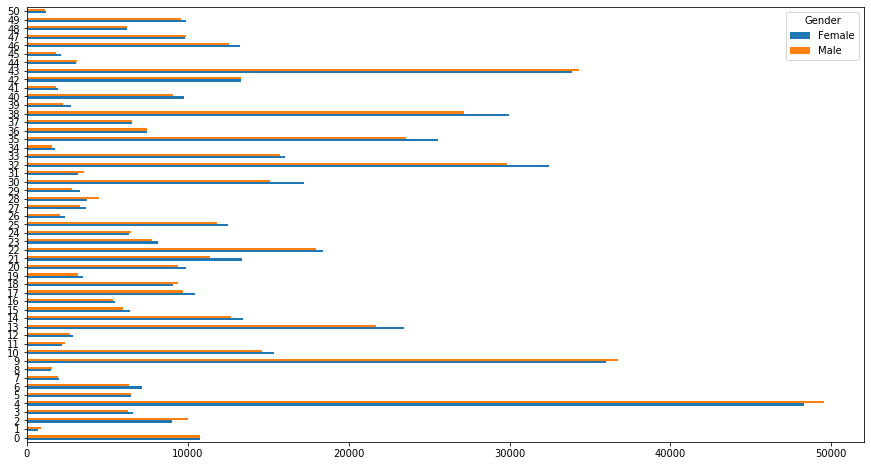

In [58]:
# Now let's make a sweet bar chart!!
pivot2.plot(kind='barh',figsize=(15,8))

Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `.set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods -- do not rebind `pivot` to be equal to this line of code. 

In [60]:
# Where's the states?! Notice the y-axis is just a list of numbers. 
# This is populated by the DataFrame's index.
# When we used the .reset_index() method, we created a new numbered index to name each row. 
# Let's fix that by making state the index again.
pivot2.set_index('State')

Gender,Female,Male
State,,
Alabama,10753.325000,10765.850000
Alaska,679.975000,860.357143
Arizona,8998.386364,10036.204545
Arkansas,6621.615385,6301.690476
California,48312.840909,49555.522727
Colorado,6460.162791,6442.500000
Connecticut,7144.641026,6315.300000
Delaware,2000.029412,1940.914286
District of Columbia,1497.580645,1534.806452


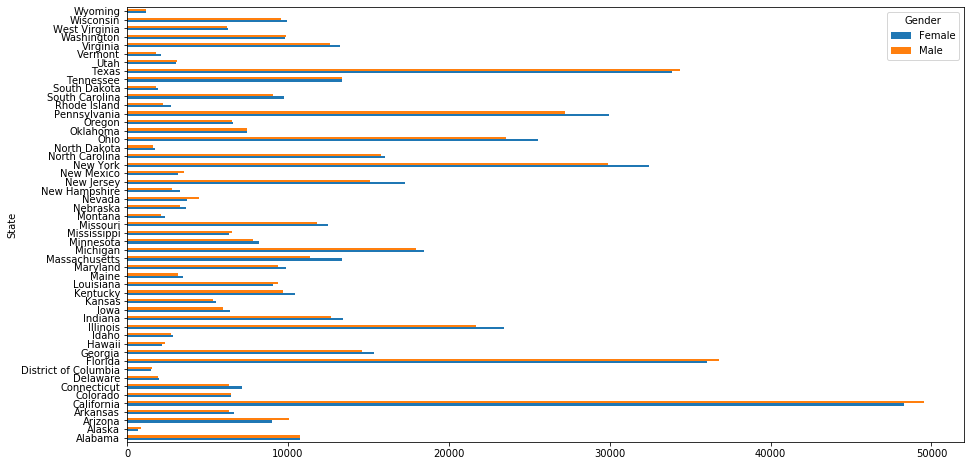

In [61]:
pivot2.set_index('State').plot(kind='barh',figsize=(15,8))

Now that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [62]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
# The above method returned a DataFrame with State as index and we plotted it,
# but it did not update the DataFrame itself.
pivot2.head()

Gender,State,Female,Male
0,Alabama,10753.325000,10765.850000
1,Alaska,679.975000,860.357143
2,Arizona,8998.386364,10036.204545
3,Arkansas,6621.615385,6301.690476
4,California,48312.840909,49555.522727


Note that the index has not changed.  That's because the code we wrote when we set the index to the `'State'` column returns a copy of the DataFrame object with the index set to `'State'` -- by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.  

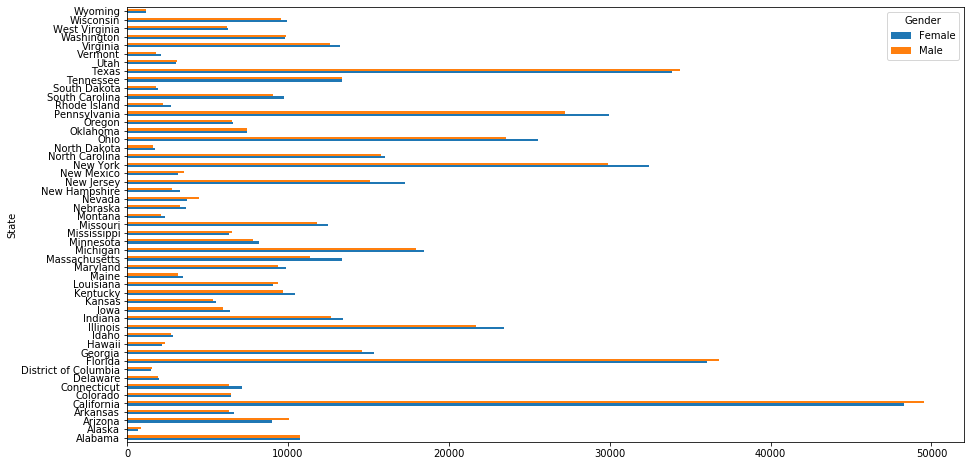

In [65]:
# If we wanted to more permanently change the index we would set it first and then plot:
pivot = pivot2.set_index('State')
pivot.plot(kind='barh',figsize=(15,8))

Again, let's check the `.head()` of the DataFrame to confirm that the index structure has changed.  

In [64]:
pivot.head()

Gender,Female,Male
State,,
Alabama,10753.325000,10765.850000
Alaska,679.975000,860.357143
Arizona,8998.386364,10036.204545
Arkansas,6621.615385,6301.690476
California,48312.840909,49555.522727


Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

In [ ]:
# Lastly, let's stack each of these bars for each state.
# Notice we don't have to worry about index here, because we've already set it above.


## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

In [67]:
grouped2.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Population_mean,Population_min,Population_max
0,Alabama,Female,10753.325000,10,116297,1.078713e+06,2087,4334752
1,Alabama,Male,10765.850000,10,88930,1.014946e+06,1129,4284775
2,Alaska,Female,679.975000,13,4727,1.440403e+05,1224,682855
3,Alaska,Male,860.357143,12,5185,1.518884e+05,578,770502
4,Arizona,Female,8998.386364,21,133923,1.246502e+06,12211,6265346


As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

In [68]:
grouped2.stack()

0    State              Alabama
     Gender              Female
     Deaths_mean        10753.3
     Deaths_min              10
     Deaths_max          116297
                         ...   
101  Deaths_min              10
     Deaths_max           10113
     Population_mean     139224
     Population_min         244
     Population_max      694760
Length: 816, dtype: object

In [71]:
grouped2.stack().shape

(816,)

In [72]:
grouped2.stack().index

MultiIndex([(  0,           'State'),
            (  0,          'Gender'),
            (  0,     'Deaths_mean'),
            (  0,      'Deaths_min'),
            (  0,      'Deaths_max'),
            (  0, 'Population_mean'),
            (  0,  'Population_min'),
            (  0,  'Population_max'),
            (  1,           'State'),
            (  1,          'Gender'),
            ...
            (100,  'Population_min'),
            (100,  'Population_max'),
            (101,           'State'),
            (101,          'Gender'),
            (101,     'Deaths_mean'),
            (101,      'Deaths_min'),
            (101,      'Deaths_max'),
            (101, 'Population_mean'),
            (101,  'Population_min'),
            (101,  'Population_max')],
           length=816)

As we can see, the `.stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index! This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [75]:
pivot.head()

Gender,Female,Male
State,,
Alabama,10753.325000,10765.850000
Alaska,679.975000,860.357143
Arizona,8998.386364,10036.204545
Arkansas,6621.615385,6301.690476
California,48312.840909,49555.522727


In [104]:
pivot.index
pivot.columns

Index(['Female', 'Male'], dtype='object', name='Gender')

In [94]:
pivot3=pivot.unstack()
pivot3

Gender  State        
Female  Alabama          10753.325000
        Alaska             679.975000
        Arizona           8998.386364
        Arkansas          6621.615385
        California       48312.840909
                             ...     
Male    Virginia         12585.833333
        Washington        9877.431818
        West Virginia     6211.612903
        Wisconsin         9573.454545
        Wyoming           1149.514286
Length: 102, dtype: float64

In [105]:
pivot3.index

MultiIndex([('Female',              'Alabama'),
            ('Female',               'Alaska'),
            ('Female',              'Arizona'),
            ('Female',             'Arkansas'),
            ('Female',           'California'),
            ('Female',             'Colorado'),
            ('Female',          'Connecticut'),
            ('Female',             'Delaware'),
            ('Female', 'District of Columbia'),
            ('Female',              'Florida'),
            ...
            (  'Male',         'South Dakota'),
            (  'Male',            'Tennessee'),
            (  'Male',                'Texas'),
            (  'Male',                 'Utah'),
            (  'Male',              'Vermont'),
            (  'Male',             'Virginia'),
            (  'Male',           'Washington'),
            (  'Male',        'West Virginia'),
            (  'Male',            'Wisconsin'),
            (  'Male',              'Wyoming')],
           names=['Gend

In [97]:
print(pivot.shape)
print(pivot3.shape)

(51, 2)
(102,)


Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results!

In the cell below, set `pivot` equal to `pivot.unstack()` again, and then print the `pivot` object to see how things have changed.

In [99]:
pivot4=pivot.unstack().unstack()
pivot4

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Gender,,,,,,,,,,,,,,,,,,,,,
Female,10753.325,679.975000,8998.386364,6621.615385,48312.840909,6460.162791,7144.641026,2000.029412,1497.580645,36019.071429,...,1932.757576,13334.325,33897.953488,3046.547619,2124.695652,13232.146341,9796.863636,6247.225806,9918.113636,1161.031250
Male,10765.850,860.357143,10036.204545,6301.690476,49555.522727,6442.500000,6315.300000,1940.914286,1534.806452,36771.340909,...,1800.500000,13333.050,34347.636364,3081.511628,1785.846154,12585.833333,9877.431818,6211.612903,9573.454545,1149.514286


After calling unstack a second time, we can see that `pivot` has a flattened structure since it has been completely unstacked!

## Summary

In this lab, we learned how to:

* Use `.groupby()` to stack and slice data conditionally
* Use aggregate methods in combination with groupby statements
* Create pivot tables with pandas
* Leverage pivot tables and groupby statements to create quick visualizations
* `stack` and `unstack` DataFrames 